In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from train_ram import train
from agent import Agent
from config import DEVICE as device

In [2]:
env = gym.make('LunarLander-v2')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

## Ablation Study

Ablation的本意是`切除`，Ablation Study就是通过控制变量法，去除掉系统的一部分后，观察系统的表现，来理解每个独立组成部分对于整个系统的重要性。这里，我们主要考察两个部分的重要性：
  * Baseline
  * Normalization

我们将在其他条件不变的情况下研究：
  * 同时去除Baseline和Normalization
  * 只去除Normalization
  * 只去除Baseline
  * 同时使用Baseline和Normalization

然后，通过他们的训练表现，来判断每个部分的意义

### Remove Baseline and Normalization

Episode 0 Reward -231.46, Average Reward -231.46
Episode 100 Reward -129.18, Average Reward -193.89
Episode 200 Reward -240.27, Average Reward -183.58
Episode 300 Reward -54.43, Average Reward -172.120
Episode 400 Reward -239.82, Average Reward -162.95
Episode 500 Reward -85.46, Average Reward -167.738
Episode 600 Reward -121.59, Average Reward -132.37
Episode 700 Reward -103.99, Average Reward -163.30
Episode 800 Reward -345.43, Average Reward -135.19
Episode 900 Reward -102.11, Average Reward -122.88
Episode 1000 Reward -55.08, Average Reward -123.25
Episode 1100 Reward -28.73, Average Reward -91.9841
Episode 1200 Reward -71.48, Average Reward -80.041
Episode 1300 Reward -86.05, Average Reward -73.811
Episode 1400 Reward -98.07, Average Reward -75.186
Episode 1500 Reward -46.19, Average Reward -67.634
Episode 1600 Reward -268.85, Average Reward -153.373
Episode 1700 Reward -54.66, Average Reward -69.9179
Episode 1800 Reward -21.91, Average Reward -71.607
Episode 1900 Reward -10.99, A

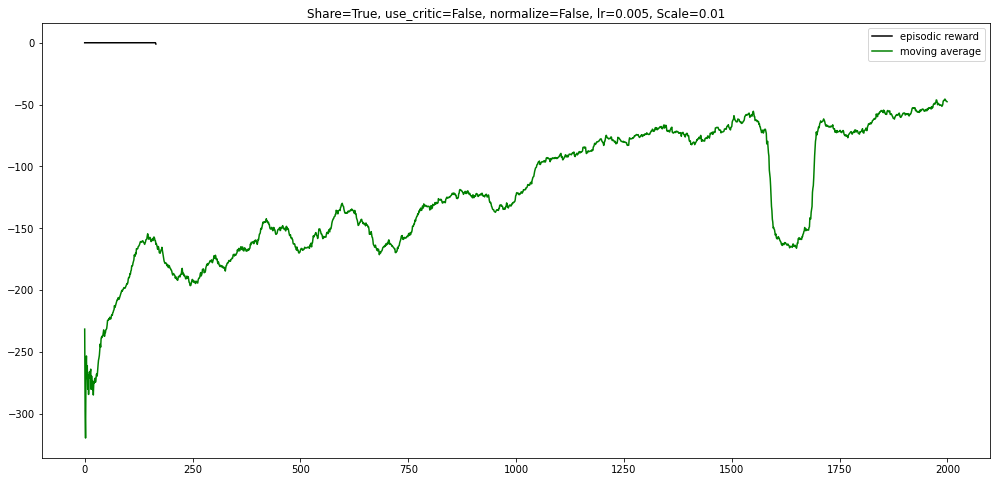

In [3]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=False, normalize=False)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1500, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

### Only remove Normalization

Episode 0 Reward -108.85, Average Reward -108.85
Episode 100 Reward -118.05, Average Reward -169.04
Episode 200 Reward -113.35, Average Reward -140.64
Episode 300 Reward -122.77, Average Reward -140.13
Episode 400 Reward -80.27, Average Reward -139.336
Episode 500 Reward -214.54, Average Reward -136.60
Episode 600 Reward -69.91, Average Reward -125.805
Episode 700 Reward -122.63, Average Reward -124.61
Episode 800 Reward -93.88, Average Reward -125.410
Episode 900 Reward -126.93, Average Reward -140.15
Episode 1000 Reward -86.57, Average Reward -132.10
Episode 1100 Reward -141.75, Average Reward -129.79
Episode 1200 Reward -76.67, Average Reward -112.572
Episode 1300 Reward -22.94, Average Reward -131.326
Episode 1400 Reward -366.40, Average Reward -110.94
Episode 1500 Reward -214.94, Average Reward -110.91
Episode 1600 Reward -63.96, Average Reward -78.2651
Episode 1700 Reward -367.88, Average Reward -71.32
Episode 1800 Reward 23.90, Average Reward -66.9630
Episode 1900 Reward -58.96,

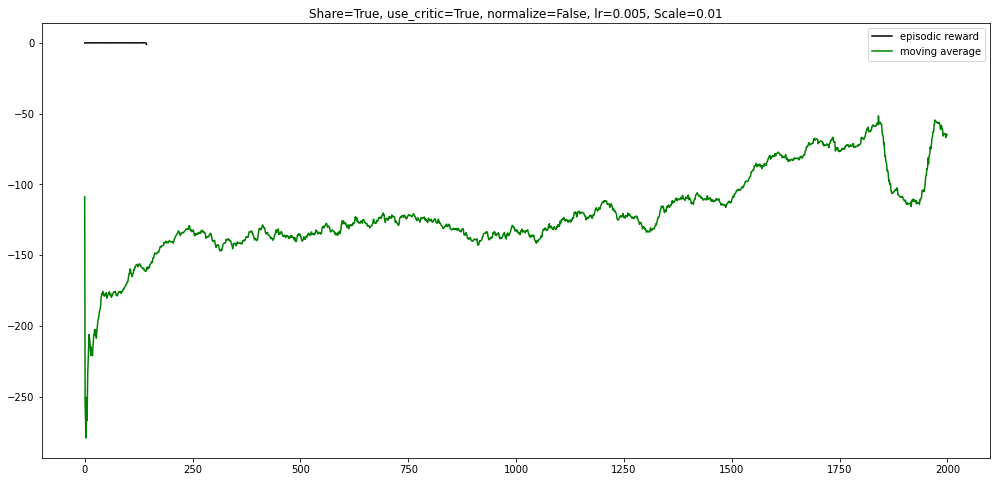

In [4]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=False)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

### Only remove Baseline (Still have implicit Baseline)

Episode 0 Reward -303.00, Average Reward -303.00
Episode 100 Reward -77.76, Average Reward -223.19
Episode 200 Reward -14.78, Average Reward -199.312
Episode 300 Reward -104.88, Average Reward -110.35
Episode 400 Reward -29.05, Average Reward -71.6182
Episode 500 Reward -1829.88, Average Reward -289.82
Episode 600 Reward -31.52, Average Reward -342.1235
Episode 700 Reward -95.29, Average Reward -118.279
Episode 800 Reward -10.44, Average Reward -51.7737
Episode 900 Reward -46.25, Average Reward -58.704
Episode 1000 Reward -10.92, Average Reward -30.24
Episode 1100 Reward -109.08, Average Reward 15.51
Episode 1200 Reward 191.60, Average Reward 33.288
Episode 1300 Reward -8.90, Average Reward 58.7772
Episode 1400 Reward 130.13, Average Reward 84.87
Episode 1500 Reward 70.86, Average Reward 125.2449
Episode 1600 Reward 179.50, Average Reward 129.29
Episode 1700 Reward 148.39, Average Reward 141.17
Episode 1800 Reward 108.39, Average Reward 144.93
Episode 1900 Reward 135.81, Average Reward

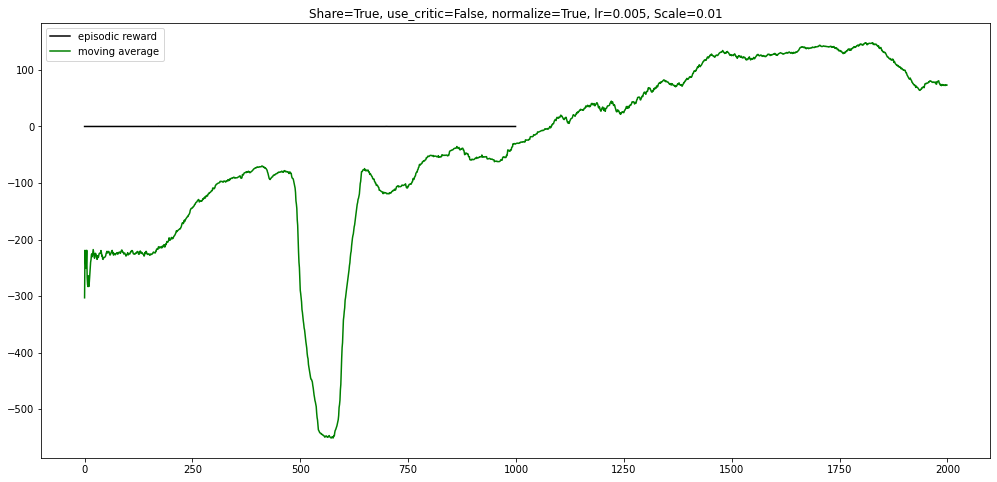

In [5]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=False, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

### Apply both Baseline and Normalization

Episode 0 Reward -88.26, Average Reward -88.26
Episode 100 Reward -93.52, Average Reward -197.77
Episode 200 Reward -226.92, Average Reward -204.94
Episode 300 Reward -113.68, Average Reward -134.72
Episode 400 Reward -31.80, Average Reward -92.6194
Episode 500 Reward 27.21, Average Reward -89.82164
Episode 600 Reward -30.08, Average Reward -37.235
Episode 700 Reward -61.01, Average Reward -15.980
Episode 800 Reward 96.14, Average Reward 5.318566
Episode 900 Reward 86.85, Average Reward 37.9731
Episode 1000 Reward 77.93, Average Reward 78.171
Episode 1100 Reward 105.25, Average Reward 98.625
Episode 1200 Reward 147.69, Average Reward 104.97
Episode 1300 Reward 227.63, Average Reward 142.23
Episode 1400 Reward 237.37, Average Reward 181.853
Episode 1500 Reward 190.76, Average Reward 153.281
Episode 1600 Reward 223.63, Average Reward 184.791
Episode 1700 Reward 313.06, Average Reward 192.480
Episode 1800 Reward 39.22, Average Reward 155.114
Episode 1900 Reward 229.85, Average Reward 216.

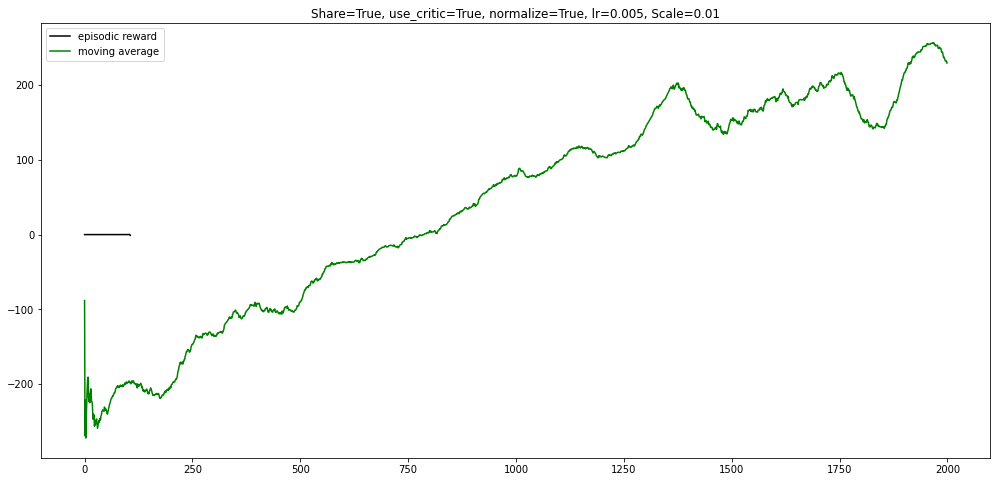

In [6]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

## Tune Learning Rate
接下来，我们在小范围内调整学习率，来查看整个算法对学习率的敏感程度。值得一提的是，大部分的强化学习算法对于学习率都很敏感

### lr-0.001

Episode 0 Reward -195.76, Average Reward -195.76
Episode 100 Reward -86.60, Average Reward -189.47
Episode 200 Reward -85.43, Average Reward -193.256
Episode 300 Reward -386.85, Average Reward -164.68
Episode 400 Reward -7.28, Average Reward -169.2707
Episode 500 Reward -101.51, Average Reward -148.86
Episode 600 Reward -9.49, Average Reward -135.5042
Episode 700 Reward -144.27, Average Reward -139.26
Episode 800 Reward -157.50, Average Reward -128.89
Episode 900 Reward -56.43, Average Reward -133.501
Episode 1000 Reward -38.20, Average Reward -133.38
Episode 1100 Reward -328.10, Average Reward -151.99
Episode 1200 Reward -219.88, Average Reward -126.11
Episode 1300 Reward -174.85, Average Reward -141.13
Episode 1400 Reward -9.27, Average Reward -102.0066
Episode 1500 Reward -164.25, Average Reward -116.16
Episode 1600 Reward -106.64, Average Reward -95.702
Episode 1700 Reward -11.44, Average Reward -74.295
Episode 1800 Reward -64.62, Average Reward -64.296
Episode 1900 Reward -51.75, 

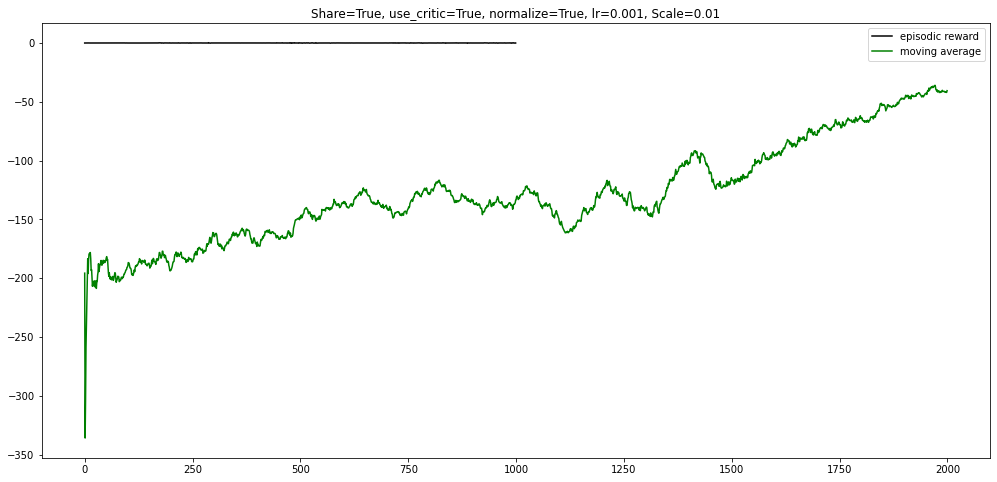

In [7]:
agent = Agent(state_size, action_size, lr=0.001, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

### lr=0.01

Episode 0 Reward -260.76, Average Reward -260.76
Episode 100 Reward -191.07, Average Reward -212.67
Episode 200 Reward -81.88, Average Reward -133.787
Episode 300 Reward -444.73, Average Reward -180.15
Episode 400 Reward -53.07, Average Reward -136.356
Episode 500 Reward -4.19, Average Reward -133.7197
Episode 600 Reward -43.60, Average Reward -64.0558
Episode 700 Reward 1.79, Average Reward -105.86.31
Episode 800 Reward -208.96, Average Reward 31.6305
Episode 900 Reward -57.99, Average Reward 30.221
Episode 1000 Reward 249.39, Average Reward 83.45
Episode 1100 Reward 37.01, Average Reward 81.2609
Episode 1200 Reward 158.80, Average Reward 89.994
Episode 1300 Reward 138.97, Average Reward 93.527
Episode 1400 Reward -113.26, Average Reward 93.33
Episode 1500 Reward -15.97, Average Reward 25.322
Episode 1600 Reward -43.92, Average Reward 104.28
Episode 1700 Reward 31.77, Average Reward 77.7152
Episode 1800 Reward 183.81, Average Reward 144.54
Episode 1900 Reward -73.48, Average Reward 23

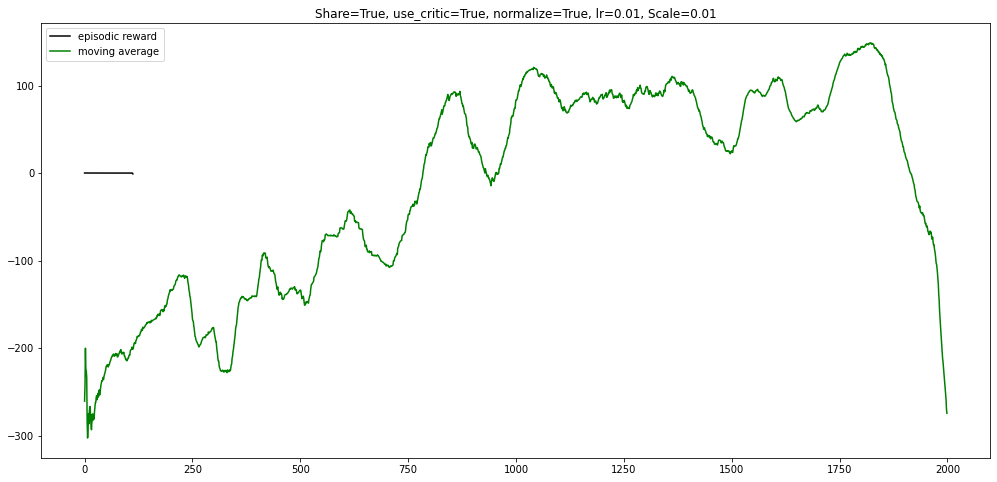

In [8]:
agent = Agent(state_size, action_size, lr=0.01, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

### lr=0.05

Episode 0 Reward -108.66, Average Reward -108.66
Episode 100 Reward -66.08, Average Reward -134.07
Episode 200 Reward -113.06, Average Reward -250.45
Episode 300 Reward -131.30, Average Reward -128.82
Episode 400 Reward -117.82, Average Reward -130.34
Episode 500 Reward -97.73, Average Reward -158.321
Episode 600 Reward -960.85, Average Reward -216.77
Episode 700 Reward -550.08, Average Reward -450.83
Episode 800 Reward -345.18, Average Reward -346.38
Episode 900 Reward -477.36, Average Reward -247.16
Episode 1000 Reward -398.42, Average Reward -337.50
Episode 1100 Reward -377.51, Average Reward -274.78
Episode 1200 Reward -333.84, Average Reward -278.55
Episode 1300 Reward -59.38, Average Reward -266.993
Episode 1400 Reward -267.85, Average Reward -352.24
Episode 1500 Reward -444.66, Average Reward -343.71
Episode 1600 Reward -292.99, Average Reward -342.30
Episode 1700 Reward -285.32, Average Reward -266.10
Episode 1800 Reward -147.54, Average Reward -196.91
Episode 1900 Reward -406.

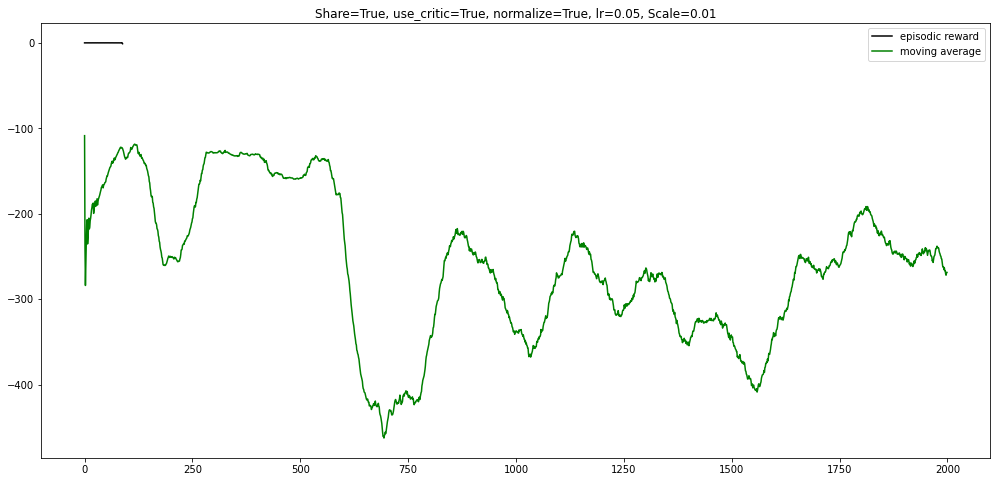

In [9]:
agent = Agent(state_size, action_size, lr=0.05, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

## Network Structure

在介绍网络结构时我们说过，如果Actor和Critic有相同的前几层，可以认为前几层在同时学习两个task，主流的观念认为multi-task learning对于神经网络的训练整体是有帮助的，这里我们也给大家展示Actor和Critic完全分开的情况

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=False, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

Episode 0 Reward -365.59, Average Reward -365.59
Episode 100 Reward -73.27, Average Reward -165.79
Episode 200 Reward -33.26, Average Reward -98.8155
Episode 300 Reward -14.61, Average Reward -177.7564
Episode 400 Reward -32.38, Average Reward -65.6703
Episode 500 Reward 115.91, Average Reward 25.9184
Episode 600 Reward 112.35, Average Reward 93.778
Episode 700 Reward 99.24, Average Reward 104.481
Episode 800 Reward -64.19, Average Reward 127.828
Episode 900 Reward 0.81, Average Reward 67.892410
Episode 1000 Reward 220.78, Average Reward 9.275
Episode 1100 Reward -21.48, Average Reward 22.277
Episode 1200 Reward 250.95, Average Reward 110.80
Episode 1300 Reward 152.83, Average Reward 149.89
Episode 1400 Reward 128.57, Average Reward 129.70
Episode 1500 Reward 213.81, Average Reward 117.60
Episode 1600 Reward 131.67, Average Reward 119.187
Episode 1607 Reward 232.51, Average Reward 124.80

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=False, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

## Tune Reward Scale
很多时候，Reward的大小和范围会对训练算法有影响，在之前的实验中我们将Reward放缩为了原来的0.01倍，下面我们使用不同的放缩率，再看算法的表现情况

### scale=0.1

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.1)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.1))
plt.legend()
plt.show()

### scale=1

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=1)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 1))
plt.legend()
plt.show()

### scale=0.001

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.001)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.001))
plt.legend()
plt.show()

## Tune Learning Frequency

然后我们查看如果利用更多样本来学习是否会提升效果

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1500, update_frequency=2, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, share=True, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1500, update_frequency=4, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

## MC or TD?

最后，我们将计算G的方式从Monte Carlo切换为Temporal Difference，查看算法的表现

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, mode='TD', share=False, use_critic=True, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, mode='TD', share=True, use_critic=True, normalize=False)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, mode='TD', share=False, use_critic=False, normalize=True)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()

In [ ]:
agent = Agent(state_size, action_size, lr=0.005, gamma=0.99, device=device, mode='TD', share=False, use_critic=False, normalize=False)
rewards, average_log = train(agent, env, n_episode=2000, max_t=1000, scale=0.01)

plt.figure(figsize=(17, 8))
plt.plot(rewards, label='episodic reward', color='black')
plt.plot(average_log, label='moving average', color='green')
plt.title('Share={}, use_critic={}, normalize={}, lr={}, Scale={}'.format(agent.share, agent.use_critic, agent.normalize, agent.lr, 0.01))
plt.legend()
plt.show()